# **No Business Like Show Business** - *Film Strategy for Box Office Success*

## Business Understanding

Our company has decided to create a new movie studio, and we have been tasked with analyzing historical box office success and providing actionable insights to guide content production. Our film strategy recommendations focus on key stakeholder questions such as:

- What defines success for a film- does popularity equate to profitability?
- What type of films have historically seen the greatest ROI?
- Do higher production budgets lead to higher revenues?

## Data Understanding

We were provided raw data sets from the movie data sources below, which can be explored further in the 'Data' directory.

- [IMDb](https://www.imdb.com)
    - 'Data/im.db' - SQL database containing movie info and cast & crew details (8 tables)
- [Box Office Mojo](https://www.boxofficemojo.com)
    - 'Data/bom.movie_gross.csv.gz' - domestic and foreign gross revenue (3387 rows x 5 columns)
- [The Numbers](https://www.the-numbers.com)
    - 'Data/tn.movie_budgets.csv.gz' - domestic and worldwide gross revenue, production budget (5782 rows x 6 cols)
- [The Movie DB](https://www.themoviedb.org)
    - 'Data/tmdb.movies.csv.gz' - genre, language, votes/popularity (26517 rows x 10 cols)
- [Rotten Tomatoes](https://www.rottentomatoes.com)
    - 'Data/rt.movie_info.tsv.gz' - synopsis, rating, runtime, etc. (1560 rows x 12 cols)
    - 'Data/rt.reviews.tsv.gz' - reviews and ratings (54432 rows x 8 cols)

Of these datasets, IMDb and The Numbers provided the most insight for our analysis. 

IMDb contained a [SQL](https://docs.python.org/3/library/sqlite3.html) database from which we created a dataframe of movie genres, runtimes, release years, and audience ratings.

The Numbers dataset contained movie production budgets and worldwide gross revenues from which we calculated return on investment (ROI) rates to then merge with the IMDb data.

After combining the datasets, our final analysis was limited to 1490 movies spanning 2010-2019.


## Data Preparation

Our data cleaning notebook can be accessed [here](https://github.com/pyamin1878/Movie-Project/blob/main/Notebooks/data_cleaning.ipynb).

### Cleaning
- Two sets of data are extracted from IMDb: `movie_basics` (basic movie information) and `movie_ratings` (ratings and votes). These datasets are then combined into a single DataFrame (a tabular data structure), focusing on titles, runtime, genres, ratings, and votes.

- This dataset is read and processed to extract budget, gross revenue, and release dates.

- The release dates are converted to a date format, and a new column for the year is created.

- Monetary values (like budget and revenue) are converted from text to numeric values for analysis.

- A new column for 'Return on Investment' (ROI) is created to evaluate the financial performance of the movies.
### Merging
- The cleaned IMDb and The Numbers data are merged based on movie titles and release years to create a comprehensive dataset.
- Unnecessary columns are dropped, and the data is cleared of any missing values.
- The data is sorted based on ROI in descending order.

### Exporting

The cleaned and processed data is saved as CSV files for easy access and use in future analyses. You can access the cleaned `.csv` file [here](https://github.com/pyamin1878/Movie-Project/blob/patrick/Data/movie_clean.csv).

![Alt text](Images/IMDB_ERD.jpeg)

## Analysis & Recommendations

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
movie_df = pd.read_csv('Data/movie_clean.csv')
genres_df = pd.read_csv('Data/genres.csv')

### Movie Counts by Genre

To get a general sense of the market, we looked at the overall count of movies in each genre. 

We found that there is heavy saturation in drama movies, followed closely by comedy and action. However, the volume of movies made does not equate to profitability; in order to maximize profit we decided to look at top genres through the lens of ROI.

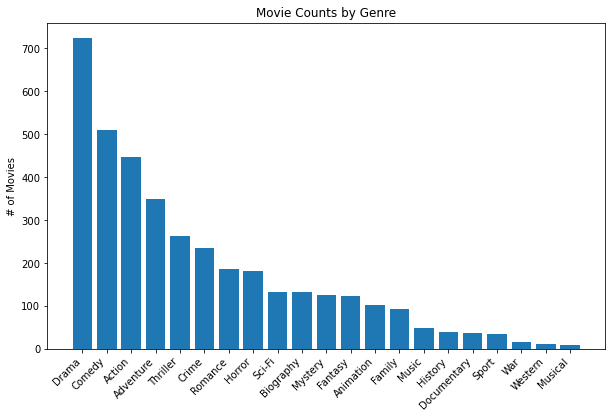

In [3]:
# Movie Counts by Genre - bar chart

genre_counts = genres_df.groupby('genres')['primary_title'].count()
genre_counts = genre_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts.values)
plt.title('Movie Counts by Genre')
plt.ylabel('# of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

### Hypothesis Test
We conducted a one way ANOVA test to analyze our genres by ROI because we have more than two genres.
- Null = genres have statistically similar ROIs
- Alternative = genres have statisitically different ROIs

In [4]:
from scipy import stats
import ast

# Convert 'genres' from comma-separated strings to lists
movie_df['genres'] = movie_df['genres'].apply(lambda x: x.split(',') if isinstance(x, str) else x)

# Explode the dataframe on the 'genres' column
df_exploded_genres = movie_df.explode('genres')

# Group by 'genres' and calculate the average ROI for each genre
genre_group = df_exploded_genres.groupby('genres')['ROI']

# Prepare the groups for ANOVA
groups = [group for name, group in genre_group]

# We'll use ANOVA if we have more than two groups
if len(groups) > 2:
    f_val, p_val = stats.f_oneway(*groups)
    anova_results = (f_val, p_val)
else:
    anova_results = ('Not enough groups for ANOVA',)

In [5]:
# Let's see the result
anova_results

(4.215288087374532, 9.619554337269154e-10)

P_val is much lower than .05 so we can reject our null hypothesis, indicating that there are statistically significant differences in the average ROI among different genres.



### Recommendation 1

**Genre**: 
 To ensure the success of the new movie studio, we recommend a strategic move to create a movie combining the horror mystery and thriller genres. Our finding has shown highest percentage of Return on Investment for these genres. Making them a reliable choice for establishing our studio's presence and guarante the satisfaction of all stakeholders involved in the project. 




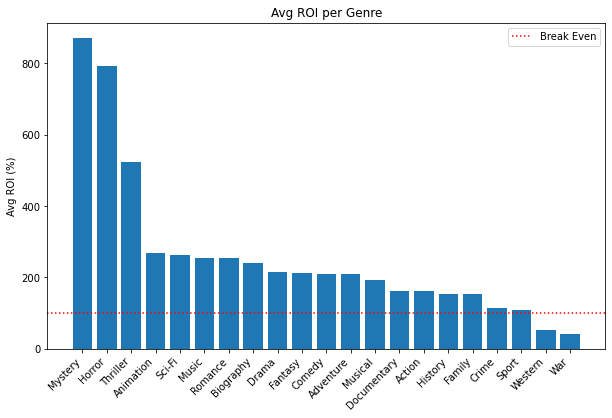

In [6]:
# ROI by Genre - bar chart

genre_roi = genres_df.groupby('genres')['ROI'].mean()
genre_roi = genre_roi.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(genre_roi.index, genre_roi.values)
plt.axhline(y=100, color='red', ls ='dotted', label='Break Even')
plt.title('Avg ROI per Genre')
plt.ylabel('Avg ROI (%)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

### Recommendation 2

**Runtime**: Based on our finding of succesful movies, we recommend maintaining an average runtime under 2 hours. Keeping the movie concise, ensures ensure their aligment with audience preference and maximize their potential reach and impact. 

In [7]:
def plot_genres_runtime(input_genres):
    
    # Define list of allowed genres
    allowed_genres = list(genres_df['genres'].value_counts().sort_index().index)
    
    # Check if input_genres is a list
    if not isinstance(input_genres, list):
        raise ValueError("Input input_genres must be a list.")

    # Check if all genres in input_genres are allowed
    for genre in input_genres:
        if genre not in allowed_genres:
            raise ValueError(f"Invalid genre: {genre}. Allowed genres are {allowed_genres}.")
  
    # Create chart
    plt.figure(figsize=(10, 6))
    plt.title('Runtime Distribution by Genre')
    plt.xlabel('Runtime (minutes)')
    plt.ylabel('Probability Density')

    # Plot bell curve for overall movies runtime
    mean = movie_df['runtime_minutes'].mean()
    std_dev = movie_df['runtime_minutes'].std()
    x = np.linspace(mean-(4*std_dev), mean+(4*std_dev), 100)
    y = norm.pdf(x, mean, std_dev)
    plt.plot(x, y, label='All Movies', color='black')

    # Calculate data and plot for each input genre
    for genre in input_genres:
        mean_genre = genres_df.loc[genres_df['genres'] == genre, 'runtime_minutes'].mean()
        std_dev_genre = genres_df.loc[genres_df['genres'] == genre, 'runtime_minutes'].std()
        x_genre = np.linspace(mean_genre-(4*std_dev_genre), mean_genre+(4*std_dev_genre), 100)
        y_genre = norm.pdf(x_genre, mean_genre, std_dev_genre)
        plt.plot(x_genre, y_genre, label=genre)

    # Show chart  
    plt.legend()
    plt.grid()
    plt.show()


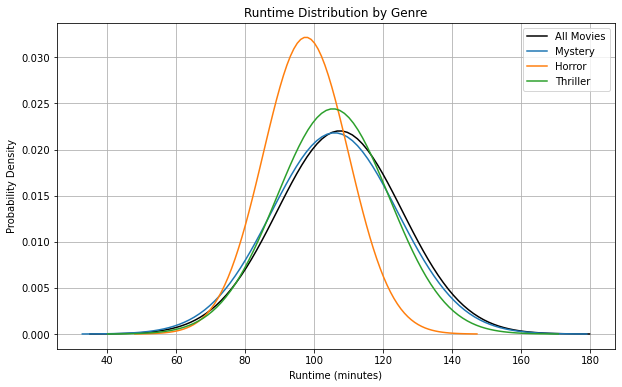

In [8]:
input_genres = ['Mystery', 'Horror', 'Thriller']
plot_genres_runtime(input_genres)

### Simple Linear Regression

In order to understand how different budget levels might impact projected revenue, we used a simple linear regression to evaluate the relationship between production budget and worldwide gross revenue.

We found an R-squared of 0.62, meaning that 62% of the variation in revenue can be explained by the budget alone. The remaining percentage would be the other factors at play, like the movie genre, cast, and marketing.

In [11]:
from sklearn.linear_model import LinearRegression

X = movie_df[['production_budget']]
y = movie_df['worldwide_gross']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Calculate the R-squared
r_squared = model.score(X, y)

print(f"R-squared: {r_squared}")

R-squared: 0.6213830792551984


### Recommendation 3

**Budget**: We recommend the studio to strategically manage the financial risk by adopting a low budget approach. Our data have identified movie labeled as Ultra-Low investment with a high Return on Investment ROI. Aiming for a lean budget minimize financial exposure while encouraging innovative storytelling.

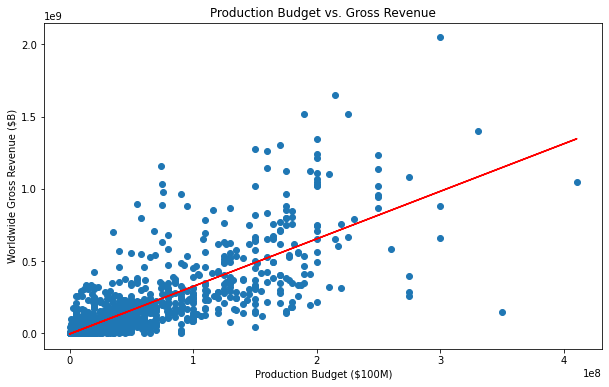

In [10]:
# Budget vs. Revenue - scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(movie_df['production_budget'], movie_df['worldwide_gross'])
plt.title('Production Budget vs. Gross Revenue')
plt.xlabel('Production Budget ($100M)')
plt.ylabel('Worldwide Gross Revenue ($B)')

# Add regression line
plt.plot(X, model.predict(X), color='red', label='Regression')

plt.show()


## Conclusion & Next Steps

### Conclusion

Based on the provided recommendations, the studio should prioritize producing a horror-mystery-thriller movie with a runtime under 2 hours and a low budget. This combination presents a profitable and safe bet for the studio's initial projects, maximizing the return on investment while satisfying stakeholders' expectations. The shorter runtime aligns with audience preferences, ensuring broader appeal and impact, while the low budget minimizes financial risk and maximizes ROI. This approach balances commercial success with artistic expression, leading to a high-impact film that resonates with audiences.


### Next Steps
- Conduct market research to identify specific trend in the recommended genres.
- Perform test screening and gather audience feedback in term of preferences.
- Build a creative team, ensuring a comprehensive approach to storytelling that captivates audiences. 
- Develop a project  with details of needed ressources and budget. Implementing strict policies regarding ressources management.
- Regularly monitoring and evaluate the budget progress through the production phase. 
